In [1]:
import pandas as pd
import json
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
file_path = 'gws_cleaned_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Unnamed: 0,wine,wine_id,wine_slug,appellation,appellation_slug,color,wine_type,regions,country,vintage,date,is_primeurs,score,confidence_index,journalist_count
0,0,"Chateau Margaux, Margaux",39051,chateau-margaux-margaux,Margaux,margaux,Red,NaN,['Bordeaux'],France,1900,2016-07-29,False,98.51,B,4
1,0,"Chateau Lafite Rothschild, Pauillac",37901,chateau-lafite-rothschild-pauillac,Pauillac,pauillac,Red,NaN,['Bordeaux'],France,1905,2018-05-01,False,84.46,C,3
2,0,"Chateau Latour, Pauillac",38177,chateau-latour-pauillac,Pauillac,pauillac,Red,NaN,['Bordeaux'],France,1909,2011-03-31,False,91.65,C,5
3,0,"Chateau Palmer, Margaux",39755,chateau-palmer-margaux,Margaux,margaux,Red,NaN,['Bordeaux'],France,1928,2020-11-01,False,98.00,B,4
4,1,"Chateau Gruaud Larose, Saint Julien",36281,chateau-gruaud-larose-saint-julien,Saint Julien,saint-julien,Red,NaN,['Bordeaux'],France,1928,2020-11-01,False,95.95,B,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28717,441,"Chateau Mejean, Graves",39251,chateau-mejean-graves,Graves,graves,Red,NaN,['Bordeaux'],France,2020,2021-05-20,True,83.04,C,3
28718,442,"Chateau La Croix De Pez, Saint Estephe",37201,chateau-la-croix-de-pez-saint-estephe,Saint Estephe,saint-estephe,Red,NaN,['Bordeaux'],France,2020,2021-05-08,True,90.09,B+,3
28719,443,"Chateau Brown, Blanc, Pessac Leognan",32831,chateau-brown-blanc-pessac-leognan,Pessac Leognan,pessac-leognan,White,dry,['Bordeaux'],France,2020,2021-05-01,True,90.60,C+,3
28720,444,"Chateau De Respide, Cuvee Callipyge, Graves",34775,chateau-de-respide-cuvee-callipyge-graves,Graves,graves,Red,NaN,['Bordeaux'],France,2020,2021-05-01,True,88.30,A,3


In [4]:
df.nunique()

Unnamed: 0          2170
wine                4105
wine_id             4105
wine_slug           4105
appellation          339
appellation_slug     338
color                  3
wine_type              4
regions               35
country               14
vintage               48
date                2189
is_primeurs            2
score               1894
confidence_index       6
journalist_count      21
dtype: int64

In [5]:
# vintage_loc = df.loc[(df['vintage']>1955) & (df['vintage'] <1980)]
vintage_loc = df.loc[(df['vintage']>1980) & (df['vintage'] <2000)]
# vintage_loc = df.loc[(df['vintage']>2000) & (df['vintage'] <2021)]

score_loc = vintage_loc.loc[(vintage_loc['confidence_index'] == 'A+') | (vintage_loc['confidence_index'] == 'A') | (vintage_loc['confidence_index'] == 'B+') | (vintage_loc['confidence_index'] == 'B')]
# score_loc

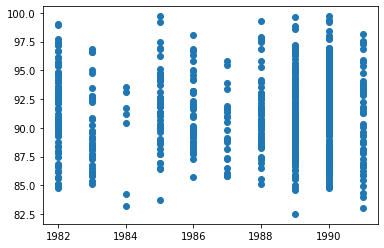

In [6]:
# X = vintage_loc['vintage']
# Y = vintage_loc['score']

X = score_loc['vintage']
Y = score_loc['score']

# Y = df['vintage']
# X = df['score']
plt.scatter(X, Y)

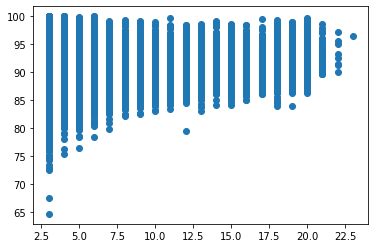

In [7]:
Y_grade = df.score
X_numGrade = df.journalist_count
plt.scatter(X_numGrade, Y_grade)

In [8]:
clean_df = df.dropna()
clean_df

,Unnamed: 0,wine,wine_id,wine_slug,appellation,appellation_slug,color,wine_type,regions,country,vintage,date,is_primeurs,score,confidence_index,journalist_count
7,4,"Chateau Lafaurie Peyraguey, Blanc, Sauternes",37872,chateau-lafaurie-peyraguey-blanc-sauternes,Sauternes,sauternes,White,sweet,['Bordeaux'],France,1928,2019-01-20,False,93.44,C,3
13,10,"Chateau D'Yquem, Blanc, Sauternes",33529,chateau-dyquem-blanc-sauternes,Sauternes,sauternes,White,sweet,['Bordeaux'],France,1928,2017-12-17,False,96.20,C+,5
19,5,"Chateau D'Yquem, Blanc, Sauternes",33529,chateau-dyquem-blanc-sauternes,Sauternes,sauternes,White,sweet,['Bordeaux'],France,1929,2018-10-06,False,98.28,B,3
23,0,"Chateau D'Yquem, Blanc, Sauternes",33529,chateau-dyquem-blanc-sauternes,Sauternes,sauternes,White,sweet,['Bordeaux'],France,1931,2020-03-01,False,84.54,C,3
28,0,"Chateau D'Yquem, Blanc, Sauternes",33529,chateau-dyquem-blanc-sauternes,Sauternes,sauternes,White,sweet,['Bordeaux'],France,1937,2016-10-15,False,96.51,B,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28695,419,"Chateau Crabitey, Blanc, Graves",33477,chateau-crabitey-blanc-graves,Graves,graves,White,dry,['Bordeaux'],France,2020,2021-05-20,False,87.14,A+,3
28709,433,"Chateau De Cerons, Blanc, Graves",33936,chateau-de-cerons-blanc-graves,Graves,graves,White,dry,['Bordeaux'],France,2020,2021-05-20,False,86.27,C+,4
28715,439,"Vignobles Tach, Chateau Les Clauzots, Blanc, G...",140233,vignobles-tach-chateau-les-clauzots-blanc-graves,Graves,graves,White,dry,['Bordeaux'],France,2020,2021-05-20,False,85.24,B,3
28719,443,"Chateau Brown, Blanc, Pessac Leognan",32831,chateau-brown-blanc-pessac-leognan,Pessac Leognan,pessac-leognan,White,dry,['Bordeaux'],France,2020,2021-05-01,True,90.60,C+,3


In [9]:
clean_df.nunique()

Unnamed: 0          1828
wine                 709
wine_id              709
wine_slug            709
appellation          136
appellation_slug     136
color                  3
wine_type              4
regions               22
country               10
vintage               40
date                 975
is_primeurs            2
score               1223
confidence_index       6
journalist_count      19
dtype: int64